In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\saran\Downloads\NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [6]:
training_set = df.iloc[:,1:2].values

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))
training_set_scaled= sc.fit_transform(training_set)

In [8]:
training_set_scaled.shape

(2035, 1)

In [11]:
# Creating a data structure with 60 timestamps and 1 output
x_train=[]
y_train=[]
for i in range(60, 2035):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1975, 60)

In [13]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [14]:
x_train.shape

(1975, 60, 1)

In [15]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
input_shape =(x_train.shape[1],1)

In [17]:
input_shape

(60, 1)

In [19]:
# Initialising the RNN
regressor = Sequential()
# units : 50,100, 200, 256,512, 1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
# Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

In [41]:
# Adding the output layer
regressor.add( Dense(units = 1))

# Compiling the RNN 
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(x_train,y_train, epochs=20 ,batch_size=32)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0227
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0047
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0030
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0028
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0026
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0024
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0019
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0021
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0017
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0017
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0016
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0016
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0015
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0015
Epoc

In [24]:
# Making the predictions and visualizing the results

df_test =pd.read_csv(r"C:\Users\saran\Downloads\tatatest.csv")
real_stock_price= df_test.iloc[:,1:2].values

In [26]:
df_test.shape

(16, 8)

In [27]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [42]:
# getting the predicted stock price of 2017
df_total = pd.concat((df['Open'], df_test['Open']), axis=0)

In [43]:
df_total

0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
       ...  
11    208.00
12    217.00
13    223.50
14    230.00
15    234.55
Name: Open, Length: 2051, dtype: float64

In [44]:
inputs = df_total[len(df_total) - len(df_test) - 60:].values

In [45]:
len(inputs)

76

In [46]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test= []
for i in range(60,76):
    x_test.append(inputs[i-60:i, 0])

In [47]:
len(x_test)

16

In [48]:
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [49]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


In [50]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

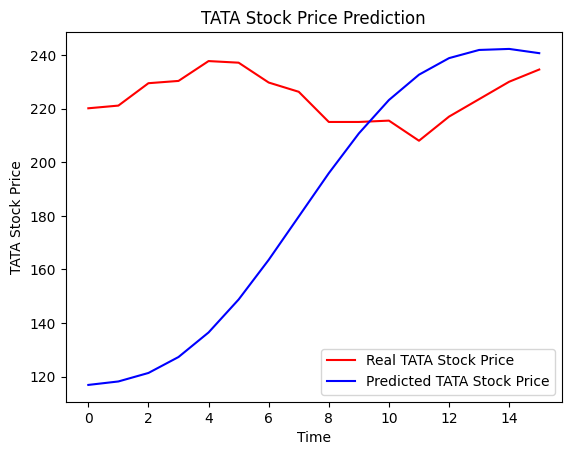

In [51]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real TATA Stock Price')
plt.plot(predicted_stock_price, color= 'blue' ,label= 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [52]:
# Run for more epochs more accurate the result will be.